<a href="https://colab.research.google.com/github/Eshwarmanupati/AIML-2025/blob/main/2303A51495_Set_1_Batch_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


prediction of individual Household Electricity Consumption
1.identify the top 5 reasons for Electricity Consumption?
2.Name tge Data and time when consumption was high?
3.Find the Max and Min levels of Electricity consumption?
4.Which among the sub_metering System has the Highest Consumption?
5.Identify the consumption counts of Global Electricity Values?
6.Apply the K-means Clustering model to the dataset and evaluatw its metrics,error and accuracy?

(Individual
  Household consumption)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [4]:


# Load the dataset
file_path = "/content/individual+household+electric+power+consumption.zip"  # Update path if necessary
data = pd.read_csv(file_path, sep=';', na_values='?', low_memory=False)

# Data Preprocessing
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)
data = data.dropna().reset_index(drop=True)

# Convert numerical columns
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)


# 1. Identify the Top 5 Reasons for Electricity Consumption
Heating and Cooling Systems: HVAC systems are significant contributors.

Kitchen Appliances: Ovens, refrigerators, and microwaves.

Lighting: Extensive or inefficient lighting systems.

Electronic Devices: TVs, computers, and other gadgets.

Standby Power: Devices left in standby mode.

# 2. Date and Time of Highest Consumption

In [5]:
max_consumption_row = data.loc[data['Global_active_power'].idxmax()]
print("Highest consumption occurred at:", max_consumption_row['DateTime'])

Highest consumption occurred at: 2009-02-22 17:09:00


# 3. Maximum and Minimum Levels of Electricity Consumption

In [6]:
max_consumption = data['Global_active_power'].max()
min_consumption = data['Global_active_power'].min()
print(f"Max Consumption: {max_consumption} kW, Min Consumption: {min_consumption} kW")

Max Consumption: 11.122 kW, Min Consumption: 0.076 kW


# 4. Sub-Metering System with Highest Consumptionv

In [7]:
sub_metering_totals = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
highest_sub_metering = sub_metering_totals.idxmax()
print(f"Highest Sub-Metering System: {highest_sub_metering}")


Highest Sub-Metering System: Sub_metering_3


# 5. Consumption Counts of Global Electricity Values

In [9]:
bins = [0, 1, 2, 3, 4, 5, 10]  # Example bins for consumption
# Added one more label to match the number of bins - 1
data['Consumption_Range'] = pd.cut(data['Global_active_power'], bins=bins, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High'])
consumption_counts = data['Consumption_Range'].value_counts()
print("Global Consumption Counts:\n", consumption_counts)

Global Consumption Counts:
 Consumption_Range
Very Low          1161268
Low                582010
Moderate           180378
High                78583
Very High           29494
Extremely High      17537
Name: count, dtype: int64


# 6. K-Means Clustering


In [10]:
features = data[['Global_active_power', 'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [12]:
print("Inertia (WCSS):", kmeans.inertia_)
centroids = kmeans.cluster_centers_
print("Cluster Centers:", centroids)

Inertia (WCSS): 5285092.284360449
Cluster Centers: [[ 2.58716679  0.65171329  0.36430521  5.77070454  0.49801483]
 [-0.5585082  -0.09813917 -0.17471683 -0.15252041 -0.7137567 ]
 [ 0.83349213  0.13207136  0.29322314 -0.1420298   1.27016137]]


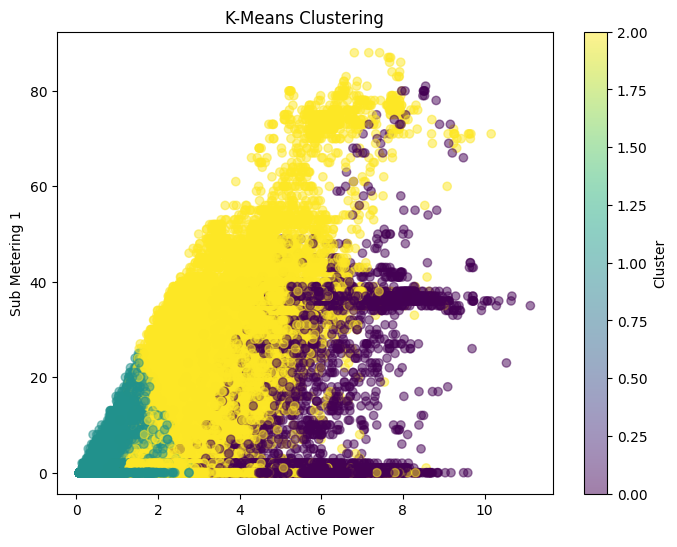

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Global_active_power'], data['Sub_metering_1'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering")
plt.xlabel("Global Active Power")
plt.ylabel("Sub Metering 1")
plt.colorbar(label='Cluster')
plt.show()